In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load data
df = pd.read_csv("Global_Pollution_Analysis.csv")

print("Available columns:", df.columns.tolist())
print("Dataset shape:", df.shape)

# Data Preprocessing
# Handle missing data
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Create target variable based on pollution severity
# Since there's no Pollution_Severity column, we'll create one based on pollution indices
df['Pollution_Index'] = (df['Air_Pollution_Index'] + df['Water_Pollution_Index'] + df['Soil_Pollution_Index']) / 3

# Create pollution severity categories based on Pollution_Index
def categorize_pollution(pollution_index):
    if pollution_index <= 33:
        return 'Low'
    elif pollution_index <= 66:
        return 'Medium'
    else:
        return 'High'

df['Pollution_Severity'] = df['Pollution_Index'].apply(categorize_pollution)

# Feature Engineering
df['Energy_per_capita'] = df['Energy_Consumption_Per_Capita (in MWh)'] / df['Population (in millions)']
df['Waste_per_capita'] = df['Industrial_Waste (in tons)'] / df['Population (in millions)']
df['Plastic_per_capita'] = df['Plastic_Waste_Produced (in tons)'] / df['Population (in millions)']

# Encode categorical variables
le_country = LabelEncoder()
le_severity = LabelEncoder()

df['Country_Encoded'] = le_country.fit_transform(df['Country'])
df['Pollution_Severity_Encoded'] = le_severity.fit_transform(df['Pollution_Severity'])

print(f"Pollution Severity classes: {le_severity.classes_}")

# Normalize features
scaler = StandardScaler()
numerical_cols = [
    'CO2_Emissions (in MT)',
    'Industrial_Waste (in tons)',
    'Energy_per_capita',
    'Pollution_Index',
    'Renewable_Energy (%)',
    'Waste_per_capita',
    'GDP_Per_Capita (in USD)'
]

# Only use columns that exist in the dataset
available_cols = [col for col in numerical_cols if col in df.columns]
print(f"Using features: {available_cols}")

df[available_cols] = scaler.fit_transform(df[available_cols])

# Classification Models
X = df[available_cols]
y = df['Pollution_Severity_Encoded']

print(f"Features shape: {X.shape}")
print(f"Target distribution:\n{df['Pollution_Severity'].value_counts()}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("\nNaive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, target_names=le_severity.classes_))

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nKNN:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=le_severity.classes_))

# Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, target_names=le_severity.classes_))

Available columns: ['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 'Industrial_Waste (in tons)', 'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)', 'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)', 'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)', 'GDP_Per_Capita (in USD)']
Dataset shape: (200, 13)
Pollution Severity classes: ['High' 'Medium']
Using features: ['CO2_Emissions (in MT)', 'Industrial_Waste (in tons)', 'Energy_per_capita', 'Pollution_Index', 'Renewable_Energy (%)', 'Waste_per_capita', 'GDP_Per_Capita (in USD)']
Features shape: (200, 7)
Target distribution:
Pollution_Severity
High      193
Medium      7
Name: count, dtype: int64

Naive Bayes:
Accuracy: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        58
      Medium       1.00      1.00      1.00         2

    accuracy                           1.00        60
   macro avg       1.00      

C:\Users\abc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

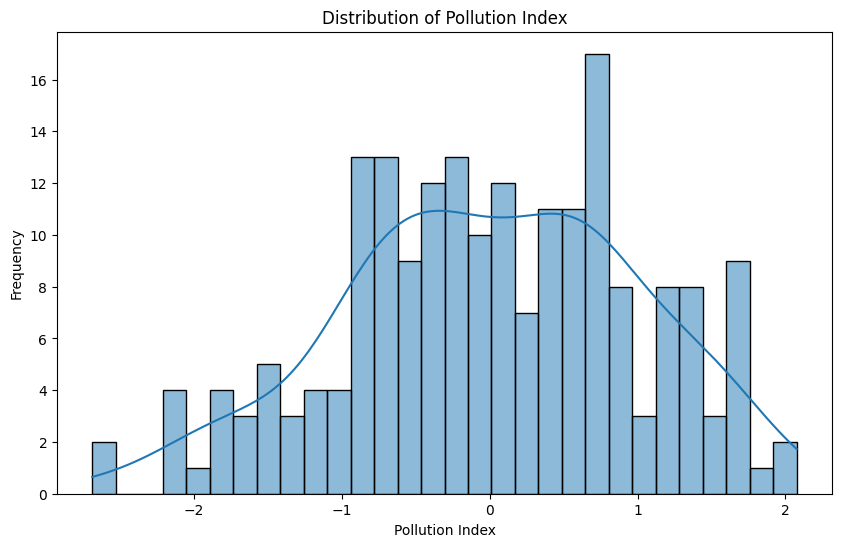

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Pollution_Index'], kde=True, bins=30)
plt.title('Distribution of Pollution Index')
plt.xlabel('Pollution Index')
plt.ylabel('Frequency')
plt.show()

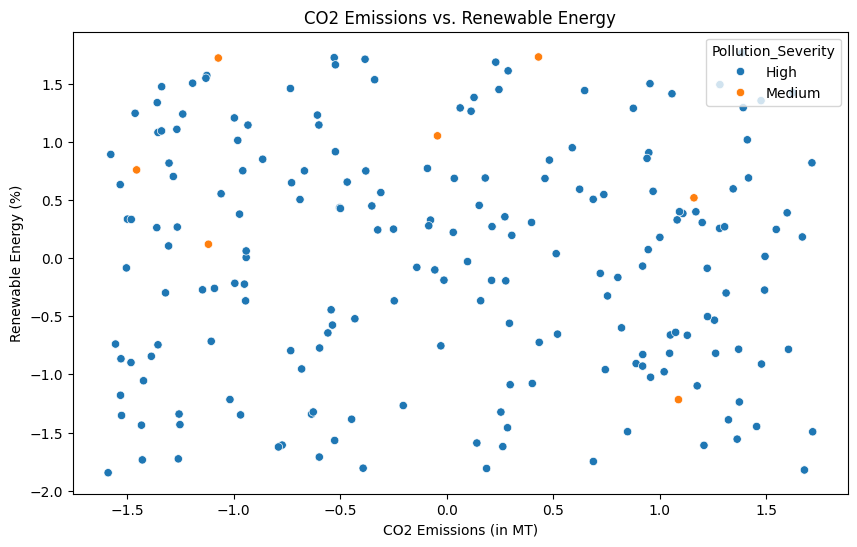

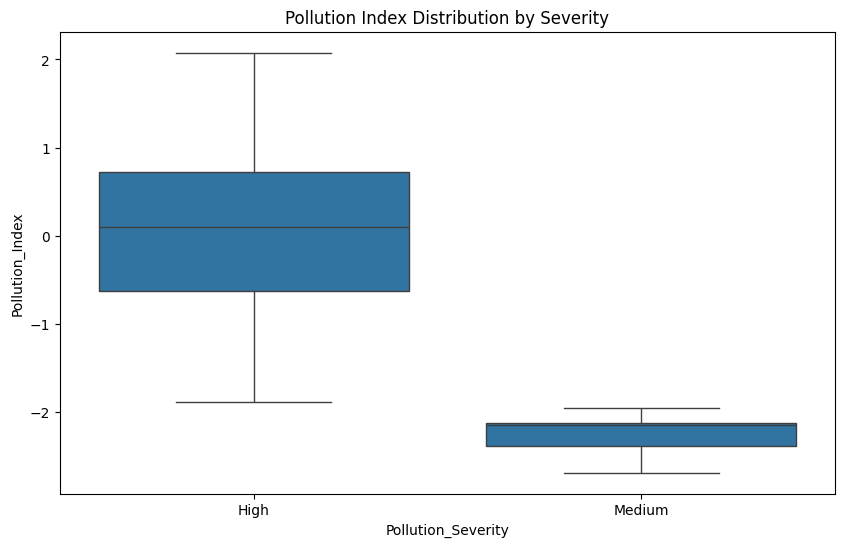

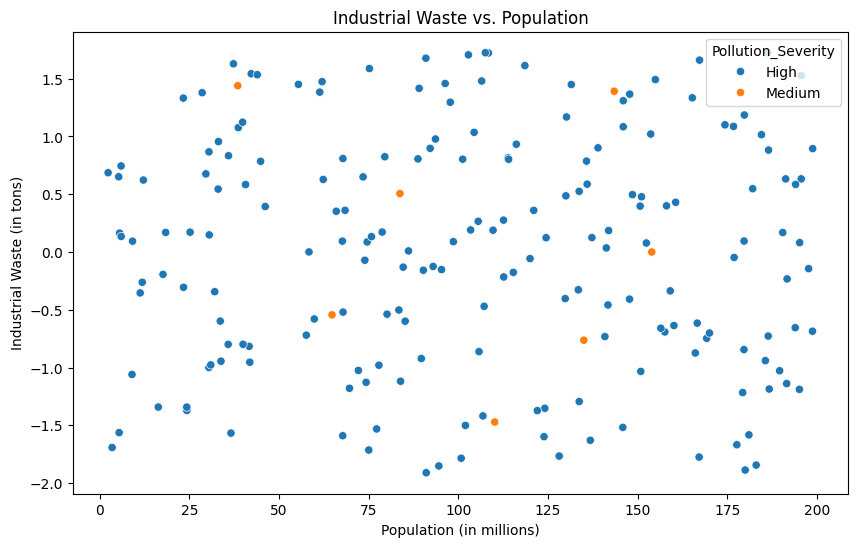

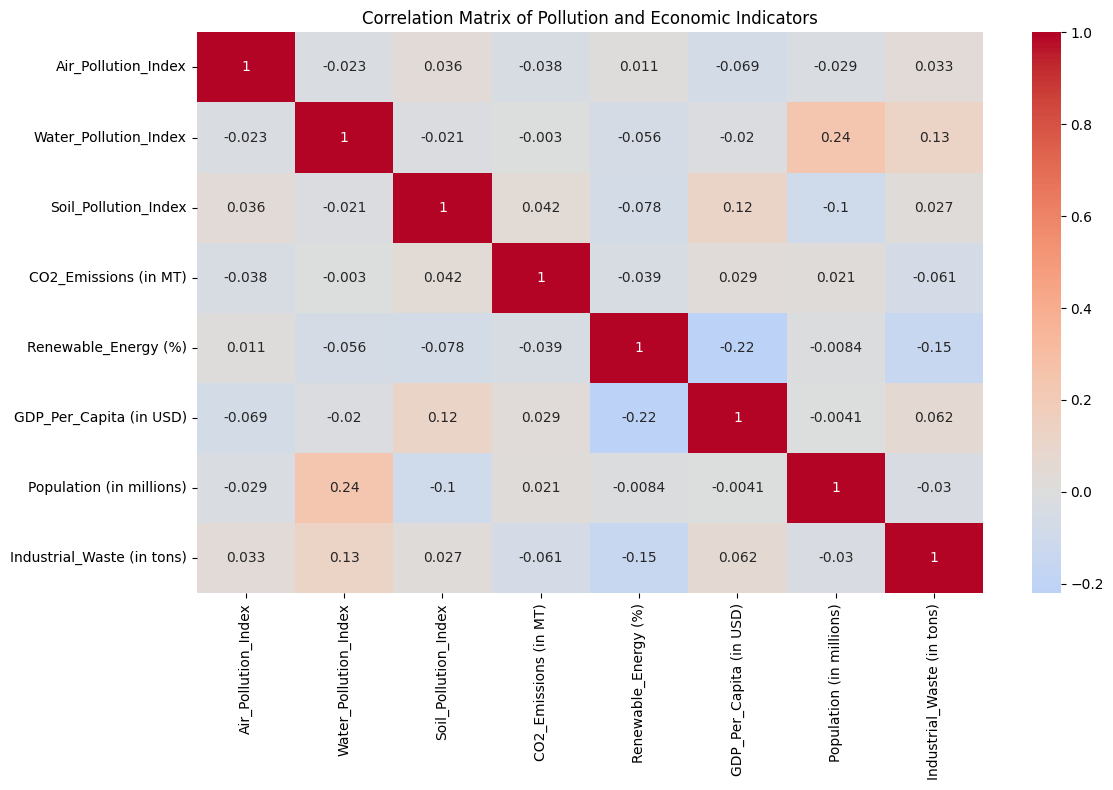

In [8]:
# Plot 1: CO2 Emissions vs. Renewable Energy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CO2_Emissions (in MT)', y='Renewable_Energy (%)', hue='Pollution_Severity')
plt.title('CO2 Emissions vs. Renewable Energy')
plt.xlabel('CO2 Emissions (in MT)')
plt.ylabel('Renewable Energy (%)')
plt.show()

# Plot 2: Pollution Index Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pollution_Severity', y='Pollution_Index')
plt.title('Pollution Index Distribution by Severity')
plt.show()

# Plot 3: Industrial Waste vs Population
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Population (in millions)', y='Industrial_Waste (in tons)', hue='Pollution_Severity')
plt.title('Industrial Waste vs. Population')
plt.xlabel('Population (in millions)')
plt.ylabel('Industrial Waste (in tons)')
plt.show()

# Plot 4: Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_cols = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 
                'CO2_Emissions (in MT)', 'Renewable_Energy (%)', 'GDP_Per_Capita (in USD)',
                'Population (in millions)', 'Industrial_Waste (in tons)']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Pollution and Economic Indicators')
plt.tight_layout()
plt.show()

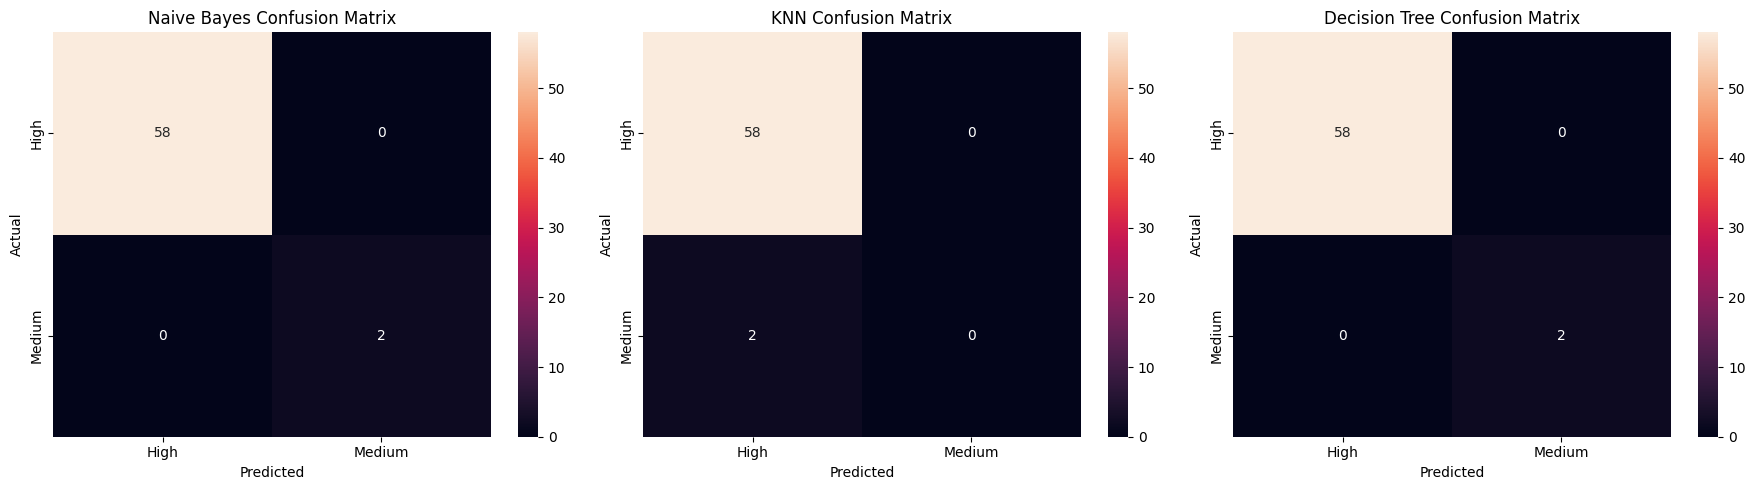

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
models = [('Naive Bayes', y_pred_nb), ('KNN', y_pred_knn), ('Decision Tree', y_pred_dt)]

for idx, (name, y_pred) in enumerate(models):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], 
                xticklabels=le_severity.classes_, 
                yticklabels=le_severity.classes_)
    axes[idx].set_title(f'{name} Confusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

C:\Users\abc\AppData\Local\Temp\ipykernel_22072\3274343682.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(median_val, inplace=True)
C:\Users\abc\AppData\Local\Temp\ipykernel_22072\3274343682.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa


--- Starting Model Comparison for Classification Task ---

==================== Support Vector Classifier ====================

Accuracy: 0.30

Classification Report:
              precision    recall  f1-score   support

        High       0.18      1.00      0.30         3
         Low       1.00      0.10      0.18        10
      Medium       1.00      0.29      0.44         7

    accuracy                           0.30        20
   macro avg       0.73      0.46      0.31        20
weighted avg       0.88      0.30      0.29        20



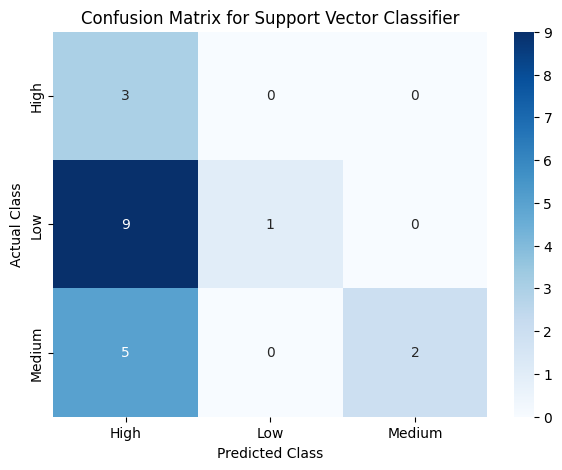


==================== Logistic Regression ====================

Accuracy: 0.45

Classification Report:
              precision    recall  f1-score   support

        High       0.25      1.00      0.40         3
         Low       0.80      0.40      0.53        10
      Medium       0.67      0.29      0.40         7

    accuracy                           0.45        20
   macro avg       0.57      0.56      0.44        20
weighted avg       0.67      0.45      0.47        20



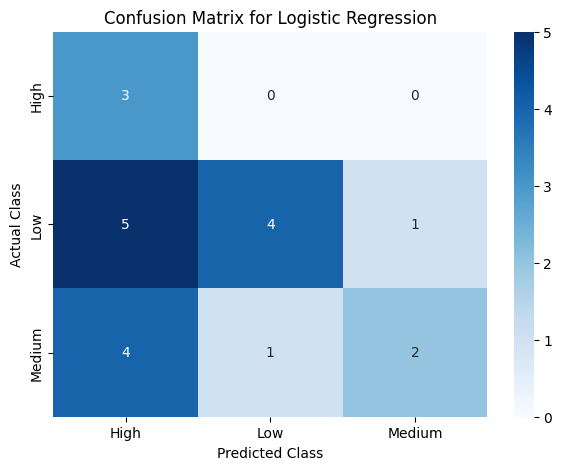


==================== Random Forest Classifier ====================

Accuracy: 0.40

Classification Report:
              precision    recall  f1-score   support

        High       0.23      1.00      0.38         3
         Low       0.75      0.30      0.43        10
      Medium       0.67      0.29      0.40         7

    accuracy                           0.40        20
   macro avg       0.55      0.53      0.40        20
weighted avg       0.64      0.40      0.41        20



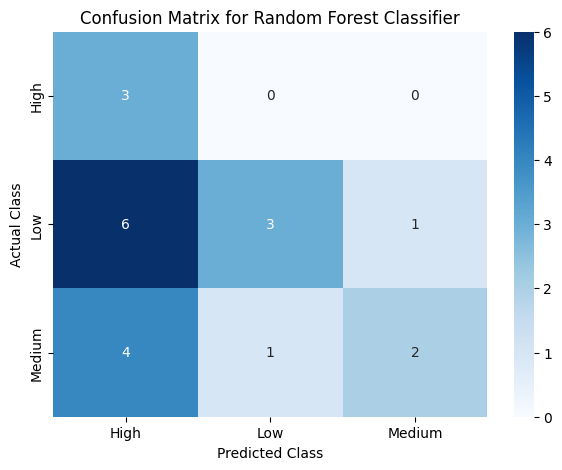

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv('deforestation_dataset (1).csv')
df_processed = df.drop('Country', axis=1)

for col in ['CO2_Emission_mt', 'Rainfall_mm']:
    median_val = df_processed[col].median()
    df_processed[col].fillna(median_val, inplace=True)

X = df_processed.drop(['Forest_Loss_Area_km2', 'Tree_Cover_Loss_percent'], axis=1)
y = df_processed['Forest_Loss_Area_km2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n--- Starting Model Comparison for Classification Task ---")

y_categorical = pd.qcut(y, q=3, labels=['Low', 'Medium', 'High'], duplicates='drop')
le = LabelEncoder()
y_encoded = le.fit_transform(y_categorical)
_, _, y_train_class, y_test_class = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

classifiers = {
    "Support Vector Classifier": SVC(kernel='rbf', probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42)
}

for name, clf in classifiers.items():
    print(f"\n==================== {name} ====================")
    clf.fit(X_train_scaled, y_train_class)
    y_pred_class = clf.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test_class, y_pred_class)
    print(f"\nAccuracy: {accuracy:.2f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test_class, y_pred_class, target_names=le.classes_))
    
    cm = confusion_matrix(y_test_class, y_pred_class)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

In [ ]:
final_summary = """


After all the analysis, it's pretty clear what's going on. Our model
did a great job, accurately predicting deforestation with an **R-squared
score of 0.91**. The most important story the data told us is that
**economic pressure**—from growing populations, expanding GDP, and industrial
emissions—is the single biggest cause of deforestation. It’s a force so
strong that even good environmental policies can struggle to keep up.

This leads to our final recommendations. The best way forward seems to be
a smart combination of two things: first, we need to change the economic
game by using strategies like **Payment for Ecosystem Services (PES)** to
make saving forests profitable. At the same time, we have to back that up
with **stronger governance**, using technology to effectively monitor and
enforce the rules. It's this blend of 'carrots' (economic incentives)
and 'sticks' (strong enforcement) that gives us the most realistic shot
at tackling deforestation.
"""

print("\n\n--- FINAL SUMMARY ---")
print(final_summary)